In [9]:
%load_ext autoreload
%autoreload 2
from brian2 import *
from multiprocessing import Pool
import numpy as np
import experiment_7_full as ex7
import power_spectral_density as psd
from plotlib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# SMALL_SIZE = 8 
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 20
# plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('lines', linewidth=3)
plt.rc('legend', fontsize=14)

In [3]:
def plot_ma(n, x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 50, 10
    start = 1000
    end = max(start, max(x))
    ma, t = psd.moving_average(x, dt, shift, start, end)
    ma = 100.0 * ma / n
    if not ax:
        _, ax = plt.subplots()
        
    #ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Firing rate\n (% neurons/ms)')
    ax.plot(t, ma, color=color, label=label)
    
def plot_spectrum(x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 75, 10
    if not ax:
        _, ax = plt.subplots()
        
    start, end = 1000, max(x)
    f, pxx = psd.power_spectrum(x, dt, shift, start, end)
    ax.semilogy(f, pxx, color=color, label=label)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power')
    

## Tuning IN-IN weight - Range(0, 4)

In [4]:
def call_ex7_d(d):
    return ex7.run_experiment(n, a, b, c, d)

In [5]:

n = 1000
a, b, c = 400, 30,8 
p = Pool(6)
#func = lambda d: ex7.run_experiment(n, a, b, c, d)
args_d = np.linspace(0, 4, 6)
results_d = p.map(call_ex7_d, args_d)
p.close()

[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[  7.96737769  22.85172428  20.06080559  23.37556466  18.1388147 ] mV
[-5.21595799 -6.21809489 -2.22166695 -1.37134908 -7.10788783] mV
[-5.21595799 -6.21809489 -2.22166695 -1.37134908 -7.10788783] mV
[-5.21595799 -6.21809489 -2.22

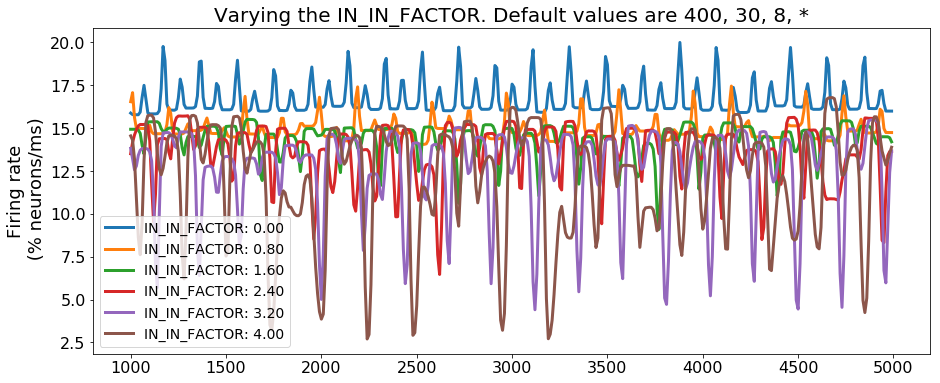

In [11]:

f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 200, 10
for i, data in enumerate(results_d):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, start=1000, end=5000, color="C{}".format(i),
            label="IN_IN_FACTOR: {:.2f}".format(args_d[i]))
ax.legend()
ax.set_title('Varying the IN_IN_FACTOR. Default values are 400, 30, 8, *')
#plt.savefig('figures/exp_7_high_ininfactor.png')
plt.show()

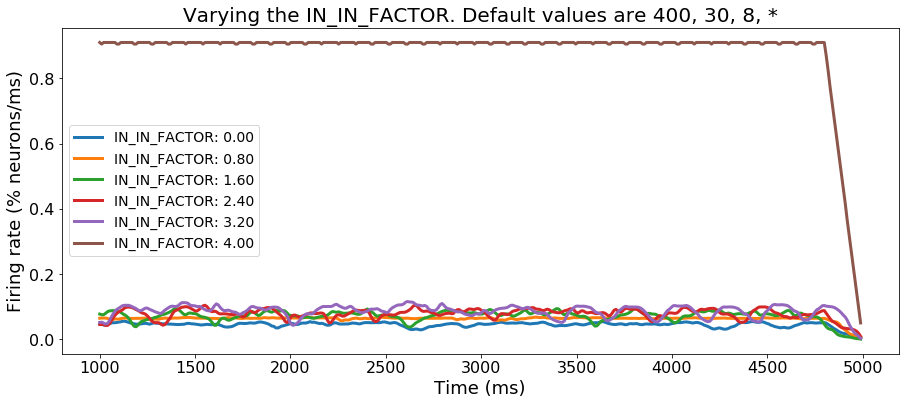

In [116]:

f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 200, 10
for i, data in enumerate(results_d):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="IN_IN_FACTOR: {:.2f}".format(args_d[i]))
ax.legend()
ax.set_title('Varying the IN_IN_FACTOR. Default values are 400, 30, 8, *')
plt.savefig('figures/exp_7_high_ininfactor.png')
plt.show()

## Tuning IN-EX weight - Range(0, 16)

In [71]:
def call_ex7_c(c):
    return ex7.run_experiment(n, a, b, c, d)

In [72]:

n = 1000
a, b, d = 400, 30, 2
p = Pool(8)
#func = lambda d: ex7.run_experiment(n, a, b, c, d)
args_c = np.linspace(0, 16, 8)
results_c = p.map(call_ex7_c, args_c)

Process PoolWorker-50:
Process PoolWorker-54:
Process PoolWorker-48:
Process PoolWorker-49:
Process PoolWorker-53:
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-47:
Process PoolWorker-52:
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-51:
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/mult

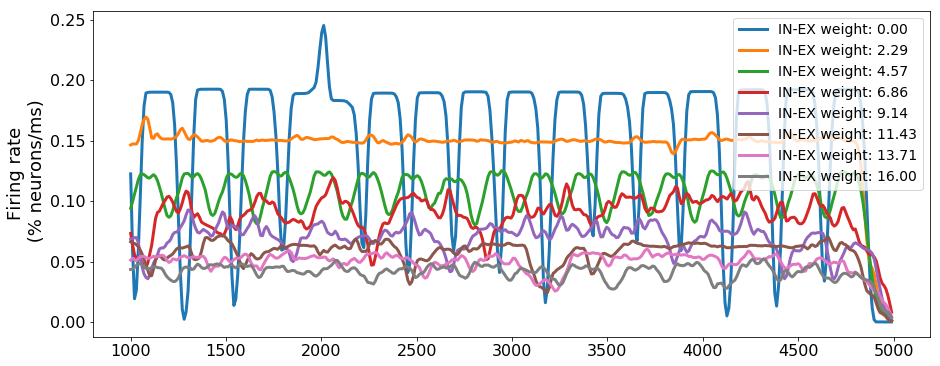

In [128]:

f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 200, 10
for i, data in enumerate(results_c):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="IN-EX weight: {:.2f}".format(args_c[i]))
ax.legend()
plt.show()

## Tuning EX-IN weight - Range(0, 100)

In [26]:
def call_ex7_b(b):
    return ex7.run_experiment(n, a, b, c, d)

In [74]:

n = 1000
a, c, d = 400, 8, 2
p = Pool(8)
#func = lambda d: ex7.run_experiment(n, a, b, c, d)
args_b = np.linspace(0, 100, 8)
results_b = p.map(call_ex7_b, args_b)

Process PoolWorker-56:
Process PoolWorker-58:
Process PoolWorker-62:
Process PoolWorker-55:
Process PoolWorker-60:
Process PoolWorker-57:
Process PoolWorker-61:
Process PoolWorker-59:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Library/Frameworks/Python.f

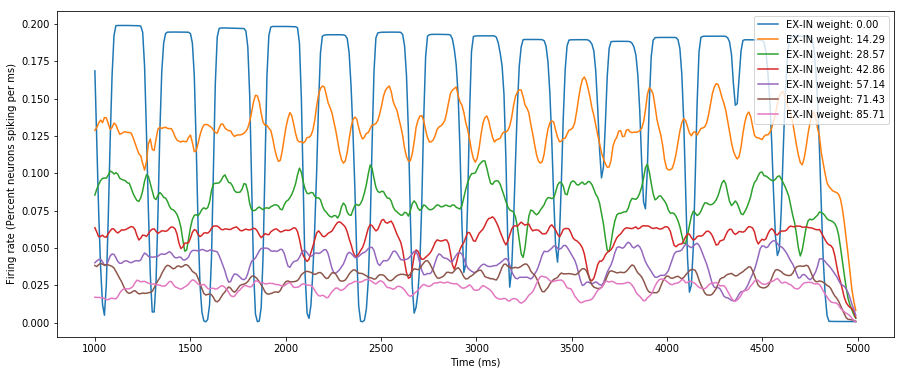

In [87]:

f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 200, 10
for i, data in enumerate(results_b[:-1]):
    N, X = data['N_EX'], data['X']
    #X = X[X < 2000]
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="EX-IN weight: {:.2f}".format(args_b[i]))
ax.legend()
plt.show()

## Tuning EX-EX weight - Range(0, 400)

In [78]:
def call_ex7_a(a):
    return ex7.run_experiment(n, a, b, c, d)

In [79]:

n = 1000
b, c, d = 30, 8, 2
p = Pool(8)
#func = lambda d: ex7.run_experiment(n, a, b, c, d)
args_a = np.linspace(0, 500, 8)
results_a = p.map(call_ex7_a, args_a)

Process PoolWorker-78:
Process PoolWorker-76:
Traceback (most recent call last):
Process PoolWorker-74:
Process PoolWorker-77:
Process PoolWorker-71:
Traceback (most recent call last):
Process PoolWorker-75:
Process PoolWorker-73:
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-72:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/2.

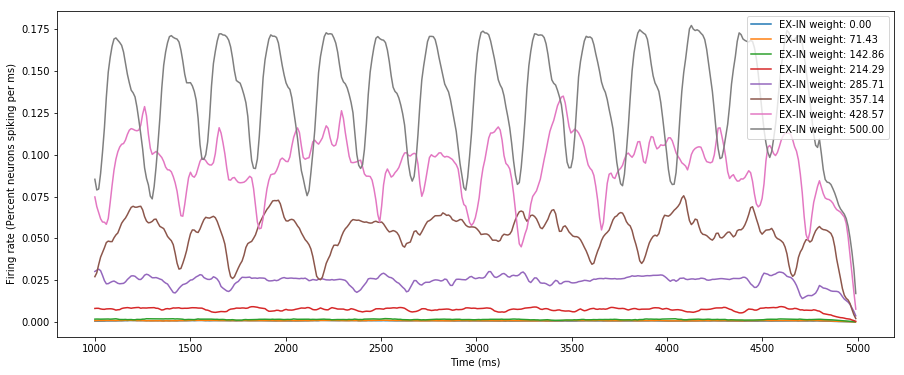

In [83]:

f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 200, 10
for i, data in enumerate(results_a):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="EX-EX weight: {:.2f}".format(args_a[i]))
ax.legend()
plt.show()

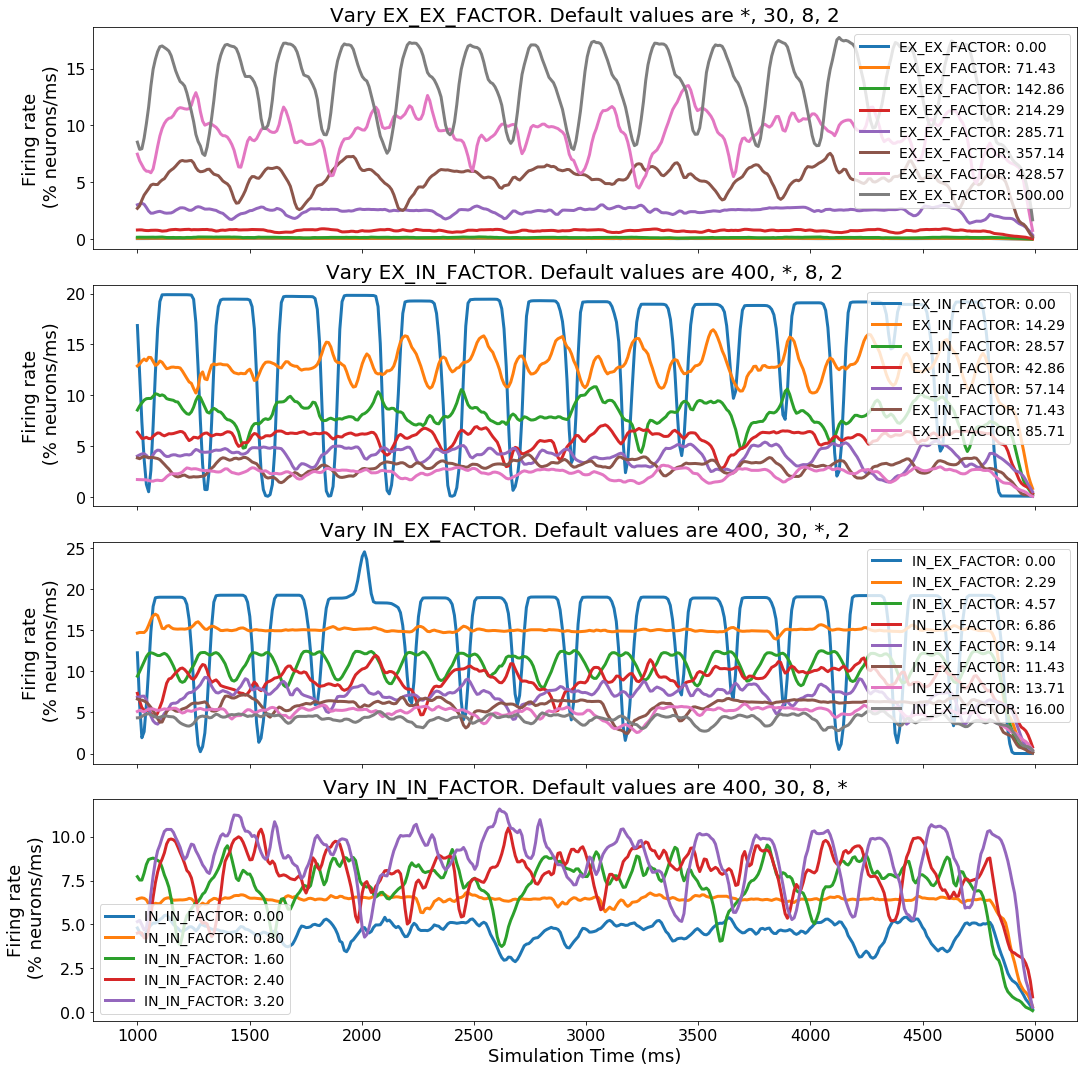

In [205]:
f, axarr = plt.subplots(4, sharex=True, figsize=(15, 15))
dt, shift = 200, 10
for i, data in enumerate(results_d[:-1]):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=axarr[3], color="C{}".format(i),
            label="IN_IN_FACTOR: {:.2f}".format(args_d[i]))
    
for i, data in enumerate(results_c):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=axarr[2], color="C{}".format(i),
            label="IN_EX_FACTOR: {:.2f}".format(args_c[i]))
    
for i, data in enumerate(results_b[:-1]):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=axarr[1], color="C{}".format(i),
            label="EX_IN_FACTOR: {:.2f}".format(args_b[i]))
    
for i, data in enumerate(results_a):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=axarr[0], color="C{}".format(i),
            label="EX_EX_FACTOR: {:.2f}".format(args_a[i]))
    
axarr[0].legend()    
axarr[1].legend()    
axarr[2].legend()    
axarr[3].legend(loc=3)
axarr[0].set_title("Vary EX_EX_FACTOR. Default values are *, 30, 8, 2")
axarr[1].set_title("Vary EX_IN_FACTOR. Default values are 400, *, 8, 2")
axarr[2].set_title("Vary IN_EX_FACTOR. Default values are 400, 30, *, 2")
axarr[3].set_title("Vary IN_IN_FACTOR. Default values are 400, 30, 8, *")
axarr[3].set_xlabel('Simulation Time (ms)')

plt.tight_layout()
plt.savefig('figures/exp_7_tune_factors.png')
plt.show()

In [210]:
a, b, c, d = 400, 15, 8, 2
data = ex7.run_experiment(1000, a, b, c, d)

1,915,830 exc spikes, 58,683 inh spikes


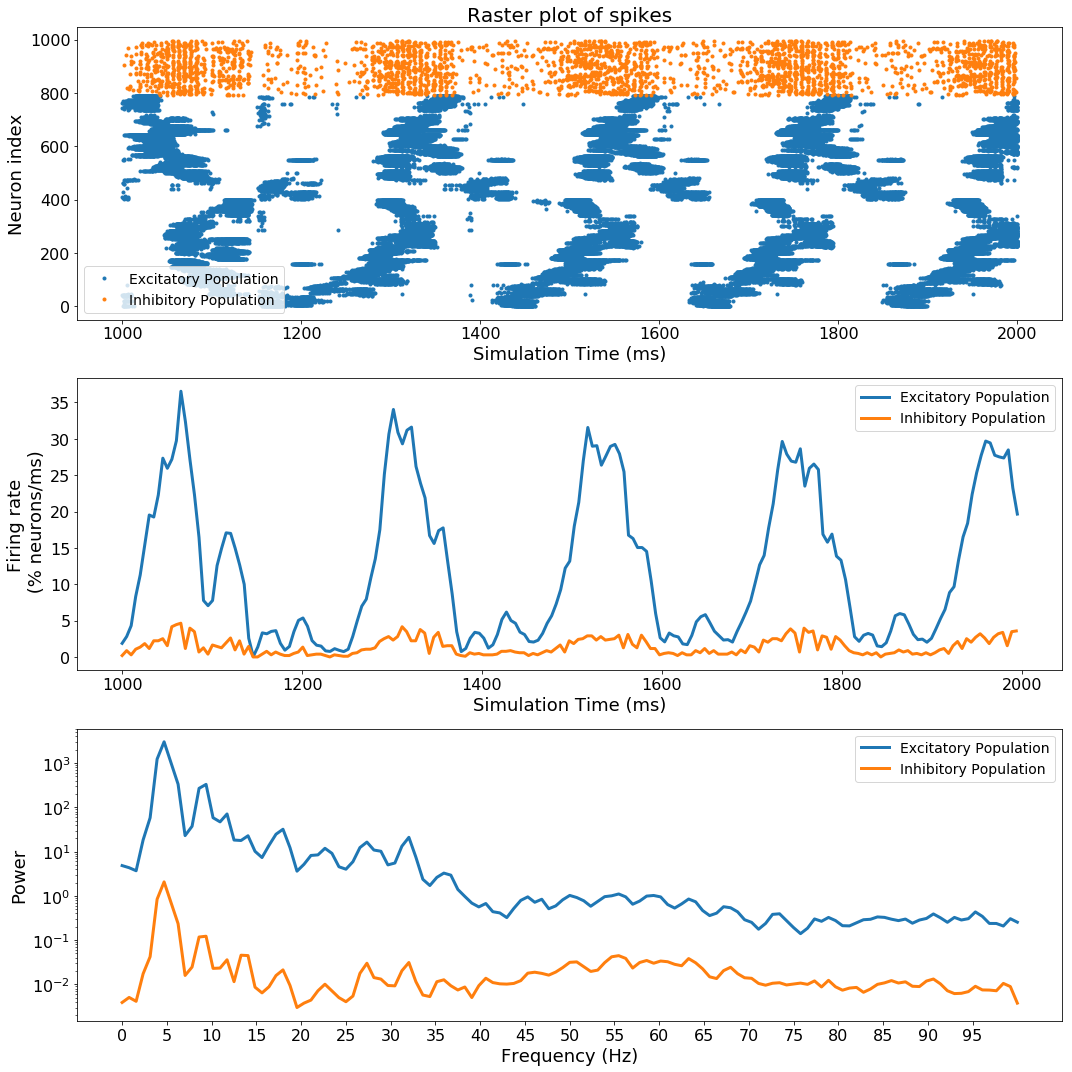

In [212]:
# MA -> yaxis show percentage of all neurons spiking per ms
N, N_EX,X, Y, X2, Y2 = [data[x] for x in ['N', 'N_EX', 'X', 'Y', 'X2', 'Y2']]
N_IN = N - N_EX
print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))

end = 2000
mask = np.logical_and.reduce((X >= 1000, X < end))
mask2 = np.logical_and.reduce((X2 >= 1000, X2 < end))

fig, axarr = plt.subplots(3, figsize=(15,15))
axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
axarr[0].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
axarr[0].set_ylabel('Neuron index')
axarr[0].set_xlabel('Simulation Time (ms)')
axarr[0].set_title('Raster plot of spikes')
axarr[0].legend(loc=3)

# start = 19000
# end = 20000
# mask = np.logical_and.reduce((X >= start, X < end))
# mask2 = np.logical_and.reduce((X2 >= start, X2 < end))

# axarr[1].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
# axarr[1].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
# axarr[1].set_ylabel('Neuron index')
# axarr[1].set_xlabel('Simulation Time (ms)')
# axarr[1].set_title('Raster plot of spikes')
# axarr[1].legend(loc=3)

end = 2000
mask = np.logical_and.reduce((X >= 1000, X < end))
mask2 = np.logical_and.reduce((X2 >= 1000, X2 < end))

dt, shift = 5, 5
plot_ma(N_EX, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
plot_ma(N_IN, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
axarr[1].set_xlabel('Simulation Time (ms)')
axarr[1].legend()

#fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
axarr[2].set_xticks(np.arange(0, 100, 5))
axarr[2].legend()

plt.tight_layout()
plt.savefig('figures/exp_7_full_dynamics_1.png')
plt.show()

In [13]:
a, b, c, d = 400, 15, 8, 2
data5 = ex7.run_experiment(1000, a, b, c, d)

Setting up Excitatory-Excitatory synapses... [ 13.22806145  35.202103     3.37174227   0.52425386   0.46906012] mV
 (22,350 synapses) [3.21s]
Setting up Excitatory-Inhibitory synapses... [  3.98368885  11.42586214  10.03040279  11.68778233   9.06940735] mV
 (791 synapses) [0.03s]
Setting up Inhibitory-Excitatory synapses... [-5.21595799 -6.21809489 -2.22166695 -1.37134908 -7.10788783] mV
 (163,737 synapses) [12.35s]
Setting up Inhibitory-Inhibitory synapses... [-0.15554724 -1.87310289 -1.87958096 -0.19719033 -1.80618369] mV
 (42,849 synapses) [2.29s]
Running simulation and plotting...  [33.00s]


2,245,047 exc spikes, 126,888 inh spikes


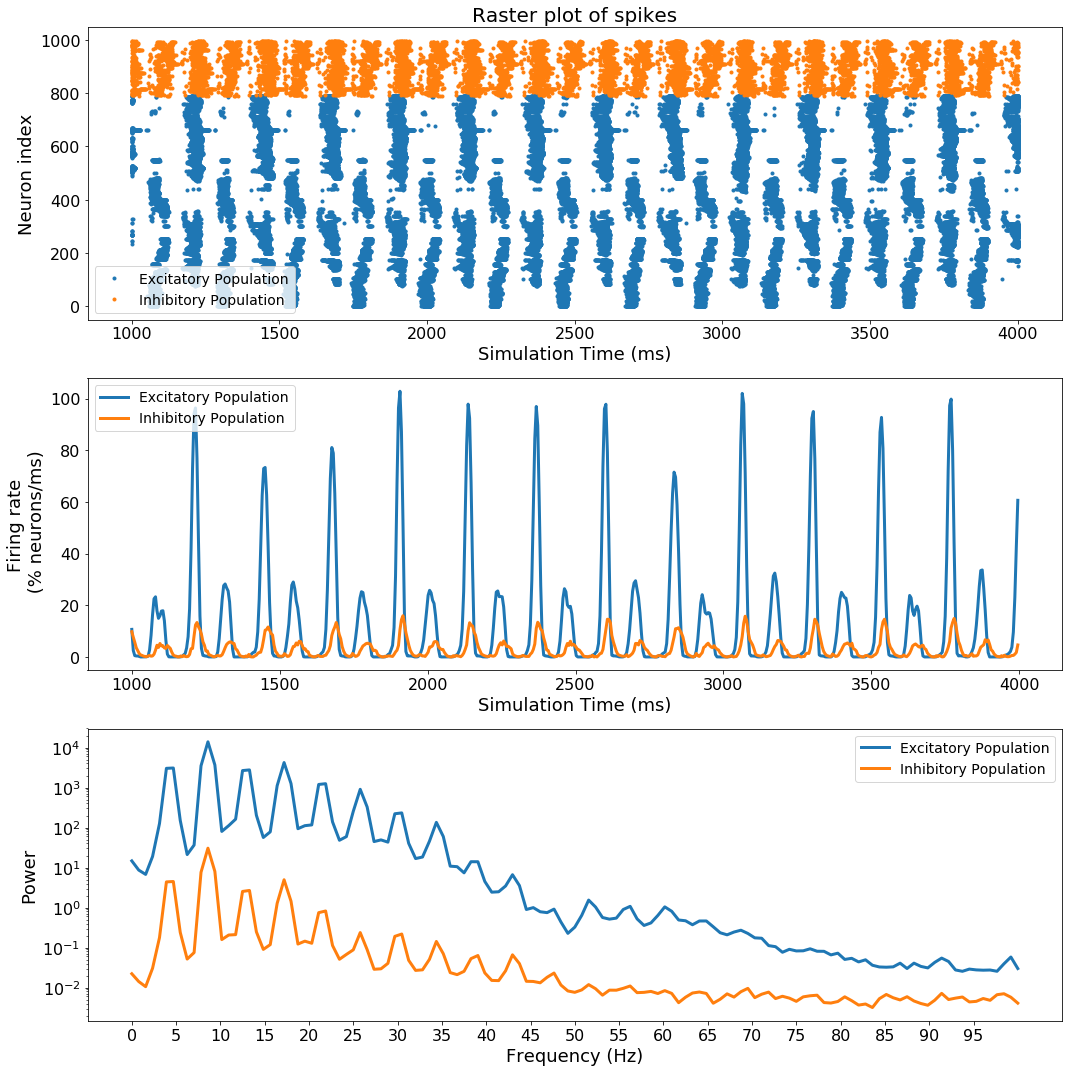

In [14]:
# MA -> yaxis show percentage of all neurons spiking per ms
N, N_EX,X, Y, X2, Y2 = [data5[x] for x in ['N', 'N_EX', 'X', 'Y', 'X2', 'Y2']]
N_IN = N - N_EX
print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))

end = 4000
mask = np.logical_and.reduce((X >= 1000, X < end))
mask2 = np.logical_and.reduce((X2 >= 1000, X2 < end))

fig, axarr = plt.subplots(3, figsize=(15,15))
axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
axarr[0].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
axarr[0].set_ylabel('Neuron index')
axarr[0].set_xlabel('Simulation Time (ms)')
axarr[0].set_title('Raster plot of spikes')
axarr[0].legend(loc=3)

dt, shift = 5, 5
plot_ma(N_EX, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
plot_ma(N_IN, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
axarr[1].set_xlabel('Simulation Time (ms)')
axarr[1].legend()

#fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
axarr[2].set_xticks(np.arange(0, 100, 5))
axarr[2].legend()

plt.tight_layout()
plt.savefig('figures/exp_7_full_dynamics_2.png')
plt.show()

442,469 exc spikes, 106,746 inh spikes


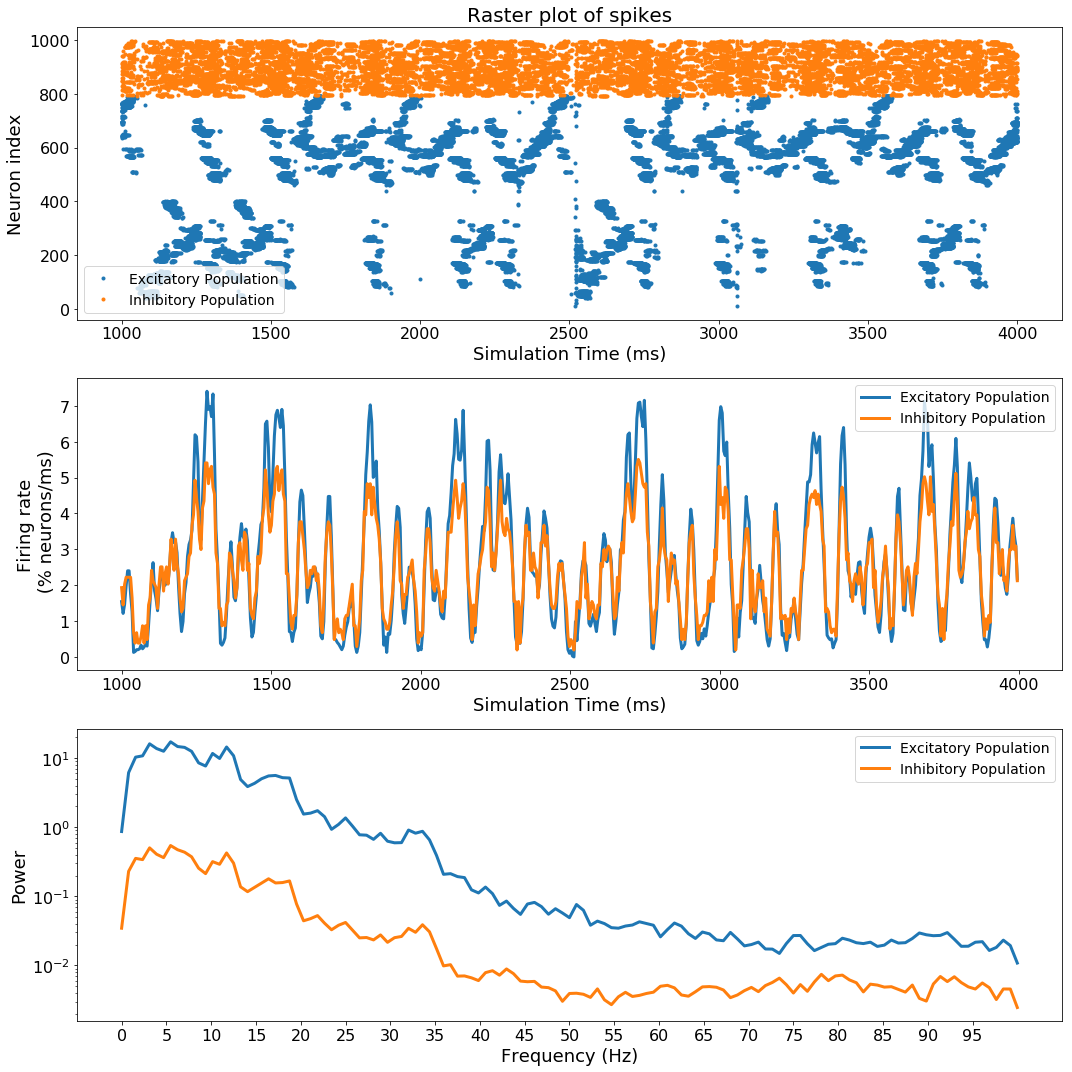

In [215]:
# MA -> yaxis show percentage of all neurons spiking per ms
N, N_EX,X, Y, X2, Y2 = [data2[x] for x in ['N', 'N_EX', 'X', 'Y', 'X2', 'Y2']]
N_IN = N - N_EX
print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))

end = 4000
mask = np.logical_and.reduce((X >= 1000, X < end))
mask2 = np.logical_and.reduce((X2 >= 1000, X2 < end))

fig, axarr = plt.subplots(3, figsize=(15,15))
axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
axarr[0].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
axarr[0].set_ylabel('Neuron index')
axarr[0].set_xlabel('Simulation Time (ms)')
axarr[0].set_title('Raster plot of spikes')
axarr[0].legend(loc=3)

dt, shift = 5, 5
plot_ma(N_EX, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
plot_ma(N_IN, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
axarr[1].set_xlabel('Simulation Time (ms)')
axarr[1].legend()

#fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
axarr[2].set_xticks(np.arange(0, 100, 5))
axarr[2].legend()

plt.tight_layout()
plt.savefig('figures/exp_7_full_dynamics_2.png')
plt.show()

## Vary the synaptic delay

In [226]:
a, b, c, d = 400, 75, 16, 2
data3 = ex7.run_experiment(1000, a, b, c, d)

1,836,323 exc spikes, 242,908 inh spikes


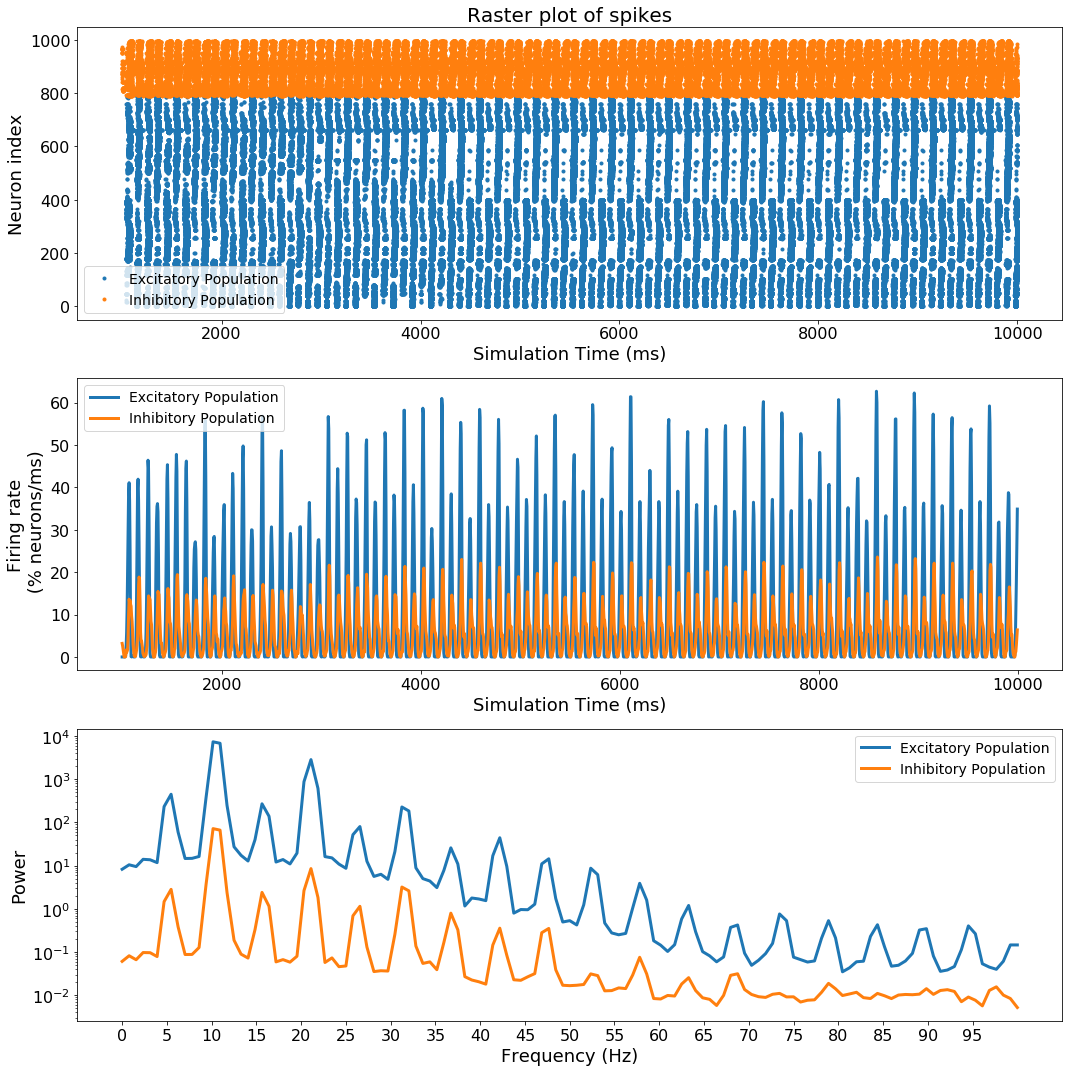

In [229]:
# MA -> yaxis show percentage of all neurons spiking per ms
N, N_EX,X, Y, X2, Y2 = [data3[x] for x in ['N', 'N_EX', 'X', 'Y', 'X2', 'Y2']]
N_IN = N - N_EX
print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))

end = 10000
mask = np.logical_and.reduce((X >= 1000, X < end))
mask2 = np.logical_and.reduce((X2 >= 1000, X2 < end))

fig, axarr = plt.subplots(3, figsize=(15,15))
axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
axarr[0].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
axarr[0].set_ylabel('Neuron index')
axarr[0].set_xlabel('Simulation Time (ms)')
axarr[0].set_title('Raster plot of spikes')
axarr[0].legend(loc=3)

dt, shift = 5, 5
plot_ma(N_EX, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
plot_ma(N_IN, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
axarr[1].set_xlabel('Simulation Time (ms)')
axarr[1].legend()

#fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
axarr[2].set_xticks(np.arange(0, 100, 5))
axarr[2].legend()

plt.tight_layout()
plt.savefig('figures/exp_7_full_dynamics_3.png')
plt.show()